In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [2]:
import requests

API_KEY = 'ODD9QRDXB19W5S30'

1. american company:  FB Meta Platforms Inc

2. canadina company: SHOP.TRT - shopify

3. precious metals - GFI  - Gold Fields Ltd

4. real estate : CIGI - Colliers International Group Stock

5. travel sector : BKNG -  Booking Holdings Inc

In [3]:
df = pd.read_csv("aggregated_data.csv")
df.columns = ["Date", "Total deaths", "Total confirmed"]
df

,Date,Total deaths,Total confirmed
0,1/22/20,17,557
1,1/23/20,18,657
2,1/24/20,26,944
3,1/25/20,42,1437
4,1/26/20,56,2120
...,...,...,...
816,4/17/22,6198487,504619899
817,4/18/22,6199914,505089291
818,4/19/22,6203317,506082451
819,4/20/22,6207815,507046645


In [4]:
from datetime import datetime
# Below are quick example
# Convert datetype to string
df['Date']=df['Date'].astype(str)
df['Date']=pd.to_datetime(df['Date'].astype(str))

df


,Date,Total deaths,Total confirmed
0,2020-01-22,17,557
1,2020-01-23,18,657
2,2020-01-24,26,944
3,2020-01-25,42,1437
4,2020-01-26,56,2120
...,...,...,...
816,2022-04-17,6198487,504619899
817,2022-04-18,6199914,505089291
818,2022-04-19,6203317,506082451
819,2022-04-20,6207815,507046645


In [5]:
df.set_index('Date', inplace=True)
df

,Total deaths,Total confirmed
Date,,
2020-01-22,17,557
2020-01-23,18,657
2020-01-24,26,944
2020-01-25,42,1437
2020-01-26,56,2120
...,...,...
2022-04-17,6198487,504619899
2022-04-18,6199914,505089291
2022-04-19,6203317,506082451


### Booking Holding Inc

In [6]:
ts = TimeSeries(key='API_KEY', output_format='pandas')
data, meta = ts.get_daily(symbol='BKNG',outputsize='full')

data.sort_values(by='date', ascending=True, inplace=True)
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,61.00,61.250,57.00,58.50,3634200.0
1999-11-02,59.25,60.190,54.63,55.44,3596400.0
1999-11-03,57.00,57.250,55.00,55.38,2677200.0
1999-11-04,56.31,57.000,52.25,53.00,3577800.0
1999-11-05,54.56,54.940,50.50,52.63,3704400.0
...,...,...,...,...,...
2022-04-18,2210.00,2226.180,2173.00,2199.31,329443.0
2022-04-19,2204.81,2252.990,2204.81,2239.38,339652.0
2022-04-20,2260.00,2284.250,2243.77,2251.80,261181.0


In [7]:
data.tail(3)
data = data.drop(index='2022-04-22')
data.tail(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-19,2204.81,2252.990,2204.81,2239.38,339652.0
2022-04-20,2260.00,2284.250,2243.77,2251.80,261181.0
2022-04-21,2316.07,2337.895,2224.28,2239.32,389840.0


In [8]:
data = data.drop(data.index[0:5086])



In [9]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-01-21,2006.00,2014.51,1963.87,1990.57,707221.0
2020-01-22,2004.33,2014.24,1992.04,2000.24,357431.0
2020-01-23,1986.24,2006.39,1975.12,1993.20,368553.0
2020-01-24,1998.00,2000.81,1954.74,1962.96,580568.0
2020-01-27,1906.41,1917.90,1868.04,1908.89,708948.0


In [10]:
data.columns = ["open", "BKNG-High", "BKNG-Low", "close" ,"volume"]
data

,open,BKNG-High,BKNG-Low,close,volume
date,,,,,
2020-01-21,2006.00,2014.510,1963.870,1990.57,707221.0
2020-01-22,2004.33,2014.240,1992.040,2000.24,357431.0
2020-01-23,1986.24,2006.390,1975.120,1993.20,368553.0
2020-01-24,1998.00,2000.810,1954.740,1962.96,580568.0
2020-01-27,1906.41,1917.900,1868.040,1908.89,708948.0
...,...,...,...,...,...
2022-04-14,2277.00,2307.460,2213.445,2227.29,402210.0
2022-04-18,2210.00,2226.180,2173.000,2199.31,329443.0
2022-04-19,2204.81,2252.990,2204.810,2239.38,339652.0


In [11]:
data = data.drop(["open","close","volume"], axis=1)
data

,BKNG-High,BKNG-Low
date,,
2020-01-21,2014.510,1963.870
2020-01-22,2014.240,1992.040
2020-01-23,2006.390,1975.120
2020-01-24,2000.810,1954.740
2020-01-27,1917.900,1868.040
...,...,...
2022-04-14,2307.460,2213.445
2022-04-18,2226.180,2173.000
2022-04-19,2252.990,2204.810


In [13]:
#This is will keep all data and fill Nan where it's missing 
# shopify_res = pd.concat([df, data], axis=1)

#This is will keep only the filled data - and remove empty cells
travel_res = pd.concat([data, df], axis=1, join="inner")
travel_res

,BKNG-High,BKNG-Low,Total deaths,Total confirmed
2020-01-22,2014.240,1992.040,17,557
2020-01-23,2006.390,1975.120,18,657
2020-01-24,2000.810,1954.740,26,944
2020-01-27,1917.900,1868.040,82,2929
2020-01-28,1937.020,1900.000,131,5580
...,...,...,...,...
2022-04-14,2307.460,2213.445,6193401,502932802
2022-04-18,2226.180,2173.000,6199914,505089291
2022-04-19,2252.990,2204.810,6203317,506082451
2022-04-20,2284.250,2243.770,6207815,507046645


## Plot

<Figure size 1440x1440 with 0 Axes>

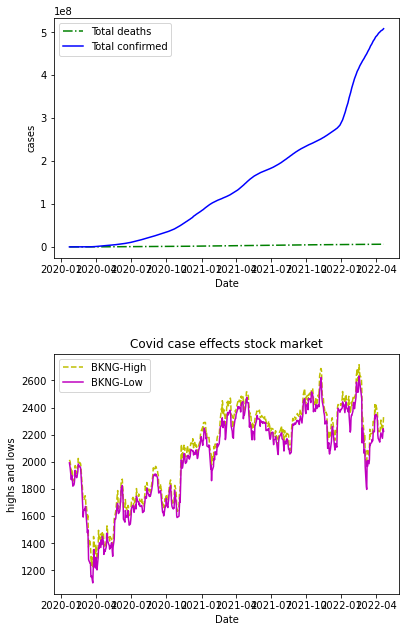

In [15]:
x = np.arange(0, 565,1)


s1 = travel_res["Total deaths"]
s2 = travel_res["Total confirmed"]
s3 = travel_res["BKNG-High"]
s4 = travel_res["BKNG-Low"]

plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 1)
axs[0].plot(s1, 'g-.', label="Total deaths")
axs[0].plot(s2, 'b-', label="Total confirmed")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('cases')               
axs[0].legend()

axs[1].plot(s3, 'y--', label="BKNG-High")
axs[1].plot(s4, 'm', label="BKNG-Low")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('highs and lows')
axs[1].legend()




plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
plt.title("Covid case effects stock market")

plt.show()

